In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/BERT_DATA/text_labels_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/BERT_DATA/text_labels_test.csv')
df_val = pd.read_csv('/content/drive/MyDrive/BERT_DATA/text_labels_val.csv')

In [ ]:
print(df_train.shape, df_test.shape, df_val.shape)

(3711, 3) (464, 3) (464, 3)


In [ ]:
!pip install text_hammer

In [ ]:
import text_hammer as th

In [ ]:
df_full = pd.concat([df_train, df_test, df_val], axis=0)
df_full

,ID,tweet,label
0,865,Wednesday High pressure remains in charge yet ...,neutral
1,1706,The Dragon watching ... Beach Green Isolated ...,positive
2,3363,Via Reddit Final Fantasy IX Mistaken Love ReM...,positive
3,1346,Prayers JesusSaves NoOtherName Overcomer TeamJ...,positive
4,3188,USER so I have the new single on repeat and yo...,positive
...,...,...,...
459,4099,Happy patriot vs The angry Black woman USER N...,positive
460,4938,VdoBuzz \n,neutral
461,660,fishing Willow Strike Spinnerbait Colorado Ble...,positive
462,4838,.USER USER luke u sent me this same photo I'm...,negative


In [ ]:
%%time

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df, col_name):
  column = col_name
  df[column] = df[column].progress_apply(lambda x:str(x).lower())
  df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) # you're -> you are; we'll be -> we will be
  df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
  df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))

  df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
  df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))

  return df

CPU times: user 2.15 ms, sys: 0 ns, total: 2.15 ms
Wall time: 6.55 ms


In [ ]:
df_cleaned = text_preprocessing(df_full, 'tweet')

  0%|          | 0/4639 [00:00<?, ?it/s]

  0%|          | 0/4639 [00:00<?, ?it/s]

  0%|          | 0/4639 [00:00<?, ?it/s]

  0%|          | 0/4639 [00:00<?, ?it/s]

  0%|          | 0/4639 [00:00<?, ?it/s]

  0%|          | 0/4639 [00:00<?, ?it/s]

In [ ]:
df_cleaned.head()

,ID,tweet,label
0,865,wednesday high pressure remains in charge yet ...,neutral
1,1706,the dragon watching beach green isolated morni...,positive
2,3363,via reddit final fantasy ix mistaken love remi...,positive
3,1346,prayers jesussaves noothername overcomer teamj...,positive
4,3188,user so i have the new single on repeat and yo...,positive


In [ ]:
df_cleaned = df_cleaned.copy()

In [ ]:
df_cleaned = df_cleaned.iloc[:, 1:]

In [ ]:
df_cleaned.head()

,tweet,label
0,wednesday high pressure remains in charge yet ...,neutral
1,the dragon watching beach green isolated morni...,positive
2,via reddit final fantasy ix mistaken love remi...,positive
3,prayers jesussaves noothername overcomer teamj...,positive
4,user so i have the new single on repeat and yo...,positive


In [ ]:
df_cleaned['num_words'] = df_cleaned.tweet.apply(lambda x:len(x.split()))

In [ ]:
df_cleaned.head()

,tweet,label,num_words
0,wednesday high pressure remains in charge yet ...,neutral,16
1,the dragon watching beach green isolated morni...,positive,11
2,via reddit final fantasy ix mistaken love remi...,positive,13
3,prayers jesussaves noothername overcomer teamj...,positive,11
4,user so i have the new single on repeat and yo...,positive,19


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4639 entries, 0 to 463
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      4639 non-null   object
 1   label      4639 non-null   object
 2   num_words  4639 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 145.0+ KB


In [ ]:
df_cleaned['label'] = df_cleaned.label.astype('category')

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4639 entries, 0 to 463
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   tweet      4639 non-null   object  
 1   label      4639 non-null   category
 2   num_words  4639 non-null   int64   
dtypes: category(1), int64(1), object(1)
memory usage: 113.4+ KB


In [ ]:
df_cleaned.label.unique()

['neutral', 'positive', 'negative']
Categories (3, object): ['negative', 'neutral', 'positive']

In [ ]:
df_cleaned.label

0       neutral
1      positive
2      positive
3      positive
4      positive
         ...   
459    positive
460     neutral
461    positive
462    negative
463    positive
Name: label, Length: 4639, dtype: category
Categories (3, object): ['negative', 'neutral', 'positive']

In [ ]:
df_cleaned.label.cat.codes

0      1
1      2
2      2
3      2
4      2
      ..
459    2
460    1
461    2
462    0
463    2
Length: 4639, dtype: int8

In [ ]:
df_cleaned['label'] = df_cleaned.label.cat.codes
df_cleaned.label

0      1
1      2
2      2
3      2
4      2
      ..
459    2
460    1
461    2
462    0
463    2
Name: label, Length: 4639, dtype: int8

In [ ]:
df_cleaned.head()

,tweet,label,num_words
0,wednesday high pressure remains in charge yet ...,1,16
1,the dragon watching beach green isolated morni...,2,11
2,via reddit final fantasy ix mistaken love remi...,2,13
3,prayers jesussaves noothername overcomer teamj...,2,11
4,user so i have the new single on repeat and yo...,2,19


In [ ]:
df_cleaned.num_words.max()

30

In [ ]:
value = df_train.shape[0]
data_train = df_cleaned.iloc[:value, :]
data_test = df_cleaned.iloc[value:value + 464, :]
data_val = df_cleaned.iloc[value + 464 : value + 928, :]

In [ ]:
print(data_train.shape, data_test.shape, data_val.shape)

(3711, 3) (464, 3) (464, 3)


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
data_train.head()

,tweet,label,num_words
0,wednesday high pressure remains in charge yet ...,1,16
1,the dragon watching beach green isolated morni...,2,11
2,via reddit final fantasy ix mistaken love remi...,2,13
3,prayers jesussaves noothername overcomer teamj...,2,11
4,user so i have the new single on repeat and yo...,2,19


In [ ]:
to_categorical(data_train.label)

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
from transformers import AutoTokenizer, TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

In [ ]:
tokenizer('Hello enjoy one life')

{'input_ids': [101, 8667, 5548, 1141, 1297, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [ ]:
x_train = tokenizer(
    text = data_train.tweet.tolist(),
    add_special_tokens=True,
    max_length=40,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

x_test = tokenizer(
    text = data_test.tweet.tolist(),
    add_special_tokens=True,
    max_length=40,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

x_val = tokenizer(
    text = data_val.tweet.tolist(),
    add_special_tokens=True,
    max_length=40,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

In [ ]:
x_train['input_ids']

<tf.Tensor: shape=(3711, 40), dtype=int32, numpy=
array([[  101, 26055,  3965, ...,     0,     0,     0],
       [  101,  1103,  7556, ...,     0,     0,     0],
       [  101,  2258,  1894, ...,     0,     0,     0],
       ...,
       [  101,  1716,  2513, ...,     0,     0,     0],
       [  101,  4795,  1440, ...,     0,     0,     0],
       [  101,  1139,   179, ...,     0,     0,     0]], dtype=int32)>

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

In [ ]:
max_len=40

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense

input_ids = Input(shape=(max_len,), dtype=tf.int32, name='input_ids')
input_mask = Input(shape=(max_len,), dtype=tf.int32, name='attention_mask')

embeddings = bert(input_ids, attention_mask=input_mask)[0]
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation='relu')(out)

y = Dense(3, activation='softmax')(out)

model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable=True

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 40)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 40)]                 0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1083102   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   72         'attention_mask[0][0]']      
                             hidden_state=(None, 40, 76                                       

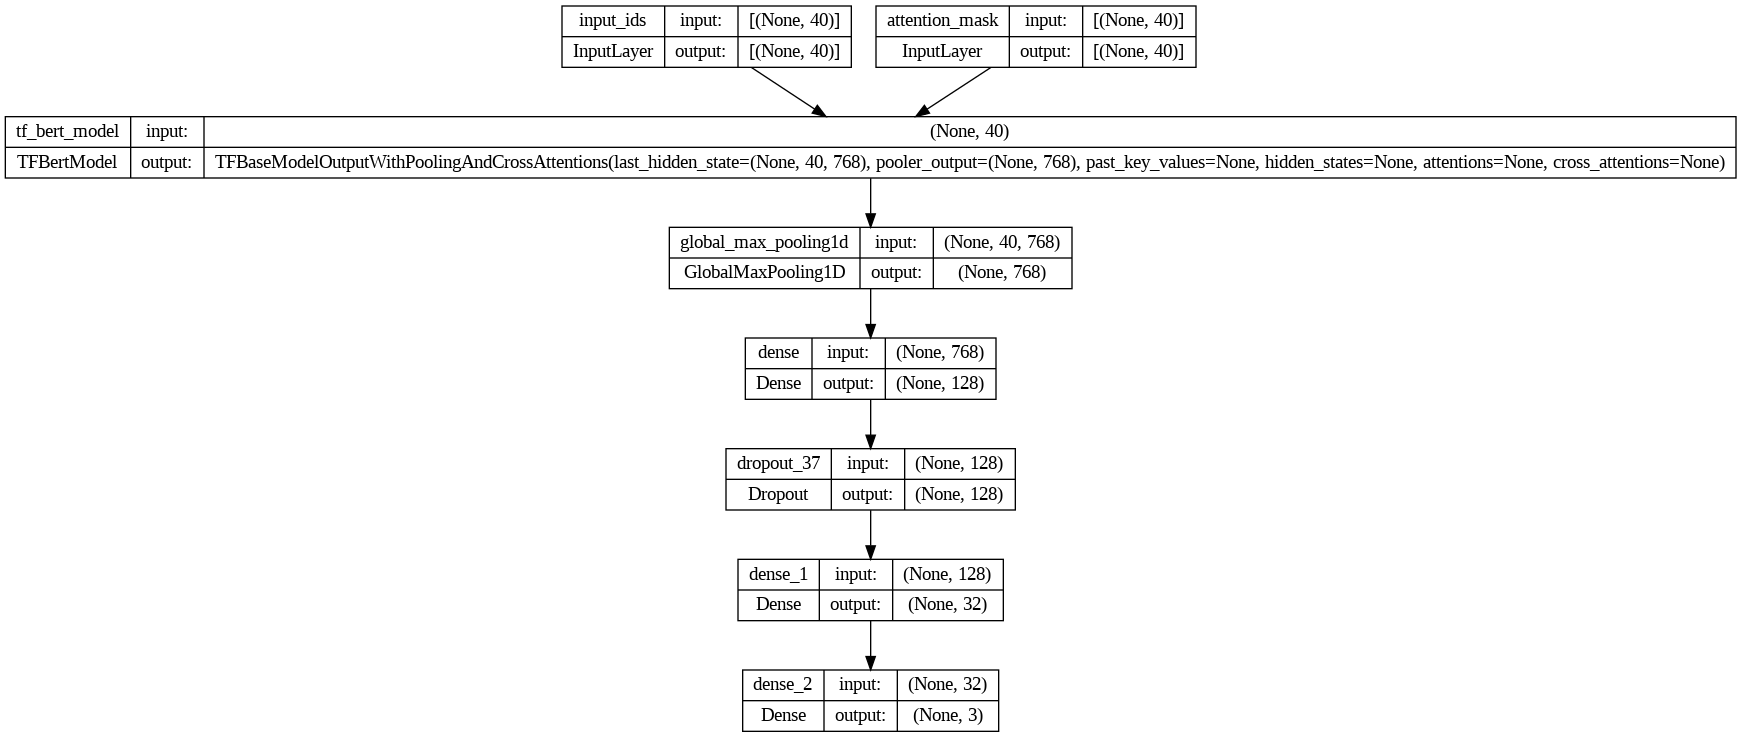

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
optimizer = Adam(
    learning_rate=5e-05,
    epsilon=1e-08,
    clipnorm=1.0)

model.compile(
    optimizer = optimizer,
    loss = CategoricalCrossentropy(from_logits=False),
    metrics=CategoricalAccuracy('balanced_accuracy'))

In [ ]:
tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
train_history = model.fit(
    x = {'input_ids':x_train['input_ids'], 'attention_mask':x_train['attention_mask']},
    y = to_categorical(data_train.label),
    validation_data = (
        {'input_ids': x_val['input_ids'], 'attention_mask':x_val['attention_mask']}, to_categorical(data_val.label)
    ),
    epochs=4,
    batch_size=36
)

In [ ]:
predicted_raw = model.predict({'input_ids':x_test['input_ids'], 'attention_mask':x_test['attention_mask']})

15/15 [==============================] - 72s 5s/step


In [ ]:
predicted_raw[0]

array([0.00337499, 0.00907248, 0.9875526 ], dtype=float32)

In [ ]:
y_predicted = np.argmax(predicted_raw, axis=1)

In [ ]:
y_predicted

array([2, 0, 2, 1, 2, 0, 0, 2, 1, 1, 0, 1, 2, 2, 2, 2, 1, 0, 0, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2,
       0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 1, 1, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0,
       2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 0,
       2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 0, 2,
       0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0,
       1, 2, 1, 2, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1,
       1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0,
       2, 1, 0, 0, 1, 2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 1, 1, 0,
       0, 2, 1, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0,

In [ ]:
data_test.label

0      2
1      0
2      0
3      1
4      2
      ..
459    0
460    2
461    2
462    0
463    1
Name: label, Length: 464, dtype: int8

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(data_test.label, y_predicted))

              precision    recall  f1-score   support

           0       0.60      0.82      0.69       120
           1       0.80      0.63      0.71       175
           2       0.79      0.76      0.77       169

    accuracy                           0.73       464
   macro avg       0.73      0.74      0.72       464
weighted avg       0.75      0.73      0.73       464

